In [77]:
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# Lecture globale des données du document CSV avec Pandas

In [79]:
data = pd.read_csv(url)
data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

# Récuperer les données des pays demandés

In [80]:
## Pays qui nous intéressent
pays = ["Belgium", "China", "China", "France", "Germany", "Iran", "Italy", "Japan","Korea, South", "Netherlands", "Portugal", "Spain", "United Kingdom", "US"]

In [81]:
## Récuperer les lignes où la colonne Country/Region vaut l'un des pays de la liste
data_pays = data[data['Country/Region'].isin(pays)]
# Exception pour la Chine car on ne veut pas HongKong tout en récupèrant les autres pays voulus
data_pays = data_pays[(data_pays['Country/Region'] != "China") |
                      (data_pays['Province/State'] != "Hong Kong")]
data_pays

Province/State  Country/Region        Lat  \
24                                            NaN         Belgium  50.833300   
59                                          Anhui           China  31.825700   
60                                        Beijing           China  40.182400   
61                                      Chongqing           China  30.057200   
62                                         Fujian           China  26.078900   
63                                          Gansu           China  35.751800   
64                                      Guangdong           China  23.341700   
65                                        Guangxi           China  23.829800   
66                                        Guizhou           China  26.815400   
67                                         Hainan           China  19.195900   
68                                          Hebei           China  39.549000   
69                                   Heilongjiang           China  47.862000   
70                                          Henan           China  37.895700   
72                                          Hubei           China  30.975600   
73                                          Hunan           China  27.610400   
74                                 Inner Mongolia           China  44.093500   
75                                        Jiangsu           China  32.971100   
76                                        Jiangxi           China  27.614000   
77                                          Jilin           China  43.666100   
78                                       Liaoning           China  41.295600   
79                                          Macau           China  22.166700   
80                                        Ningxia           China  37.269200   
81                                        Qinghai           China  35.745200   
82                                        Shaanxi           China  35.191700   
83                                       Shandong           China  36.342700   
84                                       Shanghai           China  31.202000   
85                                         Shanxi           China  37.577700   
86                                        Sichuan           China  30.617100   
87                                        Tianjin           China  39.305400   
88                                          Tibet           China  31.692700   
..                                            ...             ...        ...   
130                             Wallis and Futuna          France -14.293800   
131                                           NaN          France  46.227600   
135                                           NaN         Germany  51.165691   
150                                           NaN            Iran  32.427908   
154                                           NaN           Italy  41.871940   
156                                           NaN           Japan  36.204824   
162                                           NaN    Korea, South  35.907757   
196                                         Aruba     Netherlands  12.521100   
197              Bonaire, Sint Eustatius and Saba     Netherlands  12.178400   
198                                       Curacao     Netherlands  12.169600   
199                                  Sint Maarten     Netherlands  18.042500   
200                                           NaN     Netherlands  52.132600   
218                                           NaN        Portugal  39.399900   
241                                           NaN           Spain  40.463667   
260                                           NaN              US  40.000000   
264                                      Anguilla  United Kingdom  18.220600   
265                                       Bermuda  United Kingdom  32.307800   
266                        British Virgin Islands  United Kingdom  18.420700   
267                                

In [82]:
## Trier les données sur la colonne Country/Region
# + Additionner les lignes qui ont la même valeur dans Country/Region (comme la chine par exemple)
# + En retirant les colonnes Lat et Long qui ne sont pas utiles à notre recherche
data_pays = data_pays.groupby('Country/Region').sum().drop(columns=['Lat', 'Long'])
data_pays

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Belgium               0        0        0        0        0        0        0   
China               548      641      918     1401     2067     2869     5501   
France                0        0        2        3        3        3        4   
Germany               0        0        0        0        0        1        4   
Iran                  0        0        0        0        0        0        0   
Italy                 0        0        0        0        0        0        0   
Japan                 2        2        2        2        4        4        7   
Korea, South          1        1        2        2        3        4        4   
Netherlands           0        0        0        0        0        0        0   
Portugal              0        0        0        0        0        0        0   
Spain                 0        0        0        0        0        0        0   
US                    1        1        2        2        5        5        5   
United Kingdom        0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20    ...        2/28/23     3/1/23  \
Country/Region                               ...                             
Belgium               0        0        0    ...        4717655    4717655   
China              6077     8131     9790    ...        2027418    2027418   
France                5        5        5    ...       39827175   39831700   
Germany               4        4        5    ...       38168908   38189954   
Iran                  0        0        0    ...        7567906    7568903   
Italy                 0        0        2    ...       25576852   25576852   
Japan                 7       11       15    ...       33227230   33241180   
Korea, South          4        4       11    ...       30526012   30533573   
Netherlands           0        0        0    ...        8708982    8709011   
Portugal              0        0        0    ...        5566708    5568084   
Spain                 0        0        0    ...       13763336   13763336   
US                    6        6        8    ...      103443455  103533872   
United Kingdom        0        0        2    ...       24603373   24603450   

                   3/2/23     3/3/23     3/4/23     3/5/23     3/6/23  \
Country/Region                                                          
Belgium           4727795    4727795    4727795    4727795    4727795   
China             2027418    2027418    2027418    2027418    2027418   
France           39835896   39839090   39839090   39839090   39847236   
Germany          38202571   38210850   38210850   38210851   38210851   
Iran              7569261    7569483    7569769    7570232    7570743   
Italy            25576852   25603510   25603510   25603510   25603510   
Japan            33252686   33263208   33273639   33282370   33286633   
Korea, South     30543981   30555102   30555102   30569215   30581499   
Netherlands       8709011    8710897    8710897    8710897    8710897   
Portugal          5568084    5568084    5568084    5568084    5568084   
Spain            13763336   13770429   13770429   13770429   13770429   
US              103589757  103648690  103650837  103646975  103655539   
United Kingdom   24629830   24629840   24629840   24629840   24629840   

                   3/7/23     3/8/23     3/9/23  
Country/Region                                   
Belgium           4727795    4727795    4739365  
China             2027418    2027418    2027418  
France           39854299   39860410   39866718  
Germany          38231610   38241231   38249060  
Iran              7571352    7571996    7572311  
Italy            25603510   25603510   25603510  
Japan            33298799   33310604   33320438  
Korea, South     30594297   30605187   30615522  
Netherlands       8712835    8712

In [83]:
## .T permet de transposer les lignes et les colonnes
# Ici ont veut que les dates soient les lignes et les pays les colonnes
PaysDate = data_pays.T

PaysDate

Country/Region  Belgium    China    France   Germany     Iran     Italy  \
1/22/20               0      548         0         0        0         0   
1/23/20               0      641         0         0        0         0   
1/24/20               0      918         2         0        0         0   
1/25/20               0     1401         3         0        0         0   
1/26/20               0     2067         3         0        0         0   
1/27/20               0     2869         3         1        0         0   
1/28/20               0     5501         4         4        0         0   
1/29/20               0     6077         5         4        0         0   
1/30/20               0     8131         5         4        0         0   
1/31/20               0     9790         5         5        0         2   
2/1/20                0    11878         6         8        0         2   
2/2/20                0    16615         6        10        0         2   
2/3/20                0    19701         6        12        0         2   
2/4/20                1    23690         6        12        0         2   
2/5/20                1    27419         6        12        0         2   
2/6/20                1    30563         6        12        0         2   
2/7/20                1    34085         6        13        0         3   
2/8/20                1    36788        11        13        0         3   
2/9/20                1    39800        11        14        0         3   
2/10/20               1    42316        11        14        0         3   
2/11/20               1    44337        11        16        0         3   
2/12/20               1    44709        11        16        0         3   
2/13/20               1    59842        11        16        0         3   
2/14/20               1    66302        11        16        0         3   
2/15/20               1    68357        12        16        0         3   
2/16/20               1    70456        12        16        0         3   
2/17/20               1    72374        12        16        0         3   
2/18/20               1    74149        12        16        0         3   
2/19/20               1    74556        12        16        2         3   
2/20/20               1    75009        12        16        5         3   
...                 ...      ...       ...       ...      ...       ...   
2/8/23          4695403  2027409  39757008  37879714  7565144  25488166   
2/9/23          4700949  2027410  39760676  37893892  7565253  25488166   
2/10/23         4700949  2027410  39764042  37893892  7565367  25519067   
2/11/23         4700949  2027411  39764042  37907312  7565367  25519067   
2/12/23         4700949  2027411  39764042  37907312  7565552  25519067   
2/13/23         4700949  2027411  39770404  37928944  7565678  25519067   
2/14/23         4700949  2027411  39775390  37949446  7565865  25519067   
2/15/23         4700949  2027414  39779373  37970357  7566043  25519067   
2/16/23         4700949  2027414  39783394  37986750  7566265  25519067   
2/17/23         4708273  2027414  39786983  38002114  7566265  25547414   
2/18/23         4708273  2027415  39786983  38002114  7566311  25547414   
2/19/23         4708273  2027415  39786983  38002114  7566470  25547414   
2/20/23         4708273  2027415  39795116  38018111  7566803  25547414   
2/21/23         4708273  2027417  39800890  38043874  7567161  25547414   
2/22/23         4708273  2027417  39805492  38068912  7567421  25547414   
2/23/23         4717655  2027417  39809981  38090089  7567473  25547414   
2/24/23         4717655  2027417  39813898  38111063  7567560  25576852   
2/25/23         4717655  2027418  39813898  38111063  7567619  25576852   
2/26/23         4717655  2027418  39813898  38111063  7567702  25576852   
2/27/23         4717655  2027418  39821524  38144033  7567824  25576852   
2/28/23         4717655  2027418  39827175  38168908  7567906  25576852   
3/1/23          4717655  

# Représentation graphique avec Matplotlib

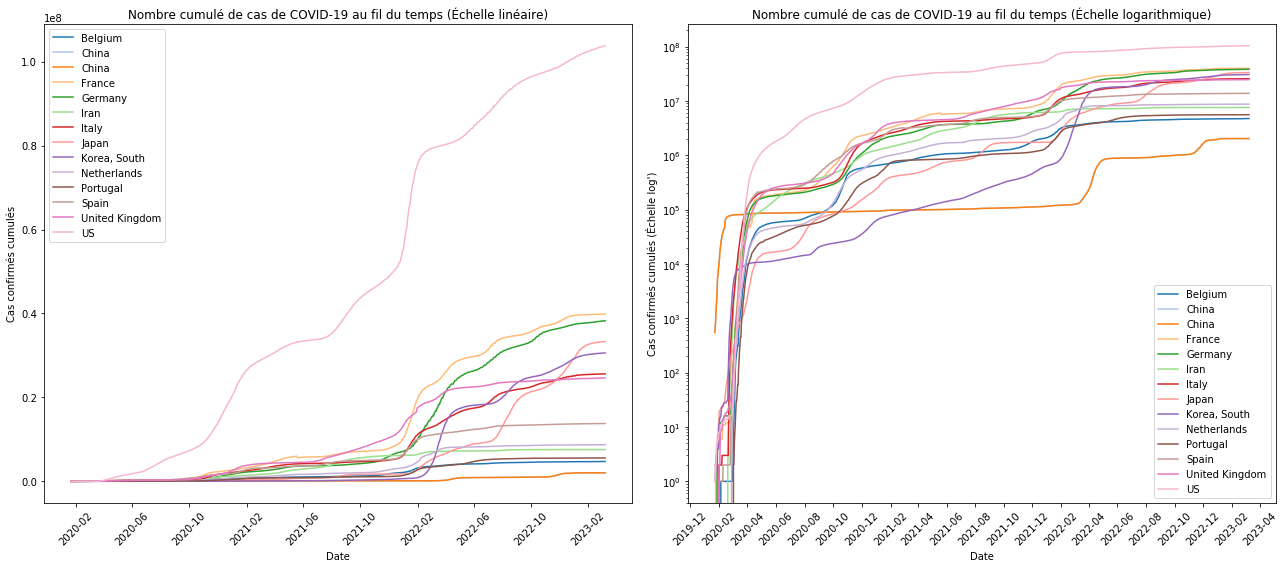

In [85]:
# Il est possible que celà prenne à peu près 1/2 à s'afficher les premières fois...

import seaborn as sns
# Je prends une palette de seaborn car celle par défaut offrent des couleurs qui peuvent se confondre entre elles
colors = sns.color_palette("tab20", len(pays))


# Création des graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

## Ax1
for i,p in enumerate(pays):
    if p in PaysDate.columns:
        ax1.plot(PaysDate.index, PaysDate[p], label=p, color=colors[i])

ax1.set_title("Nombre cumulé de cas de COVID-19 au fil du temps (Échelle linéaire)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Cas confirmés cumulés")
ax1.legend(loc='best')
ax1.tick_params(axis='x', rotation=45)

## Ax2
for i,p in enumerate(pays):
    if p in PaysDate.columns:
        ax2.plot(PaysDate.index, PaysDate[p], label=p, color=colors[i])
        
ax2.set_yscale("log")
ax2.set_title("Nombre cumulé de cas de COVID-19 au fil du temps (Échelle logarithmique)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Cas confirmés cumulés (Échelle log')")
ax2.legend(loc='best')
ax2.tick_params(axis='x', rotation=45)


# Optimiser l'axe X pour éviter les chevauchements et/ou se retrouver avec une grosse masse noire de dates illisible
import matplotlib.dates as mdates

PaysDate.index = pd.to_datetime(PaysDate.index) # Convertir les dates (qui sont en string) en type Date avec pandas

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Affiche une date tout les 3mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Prends un format d'affichage ANNEE-MOIS
# (ptl.gca() permet d'acceder aux axes, ici on accède à celui des x avec .xaxis)

plt.xticks(rotation=45) # Rotation des dates sur l'axe X 
plt.legend(loc='best') # Afficher le pays correspondant à chaque couleur à la meilleur position par rapport au graphique
plt.tight_layout() # Interface minimaliste

plt.show()

Si jamais vous voyez une masse noire ou rien au niveau des dates sur les graphes ci-dessus, réexecutez la cellule une seconde fois